In [1]:
import os
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [2]:
df_train=pd.read_csv("AdvWorksCusts.csv")
ave_spend=pd.read_csv("AW_AveMonthSpend.csv")
bike_buyer=pd.read_csv('AW_BikeBuyer.csv')
df_test=pd.read_csv('AW_test.csv')

In [3]:
print('Shape before merging Data:', df_train.shape)
df_train=pd.merge(df_train,ave_spend,how='inner', on='CustomerID')
print('Shape After merging Data:', df_train.shape)

Shape before merging Data: (16519, 23)
Shape After merging Data: (16749, 24)


In [4]:
print('Shape before dropping duplicates', df_train.shape)
df_train.drop_duplicates(subset='CustomerID', keep='last')
print('Shape after dropping duplicates', df_train.shape)

Shape before dropping duplicates (16749, 24)
Shape after dropping duplicates (16749, 24)


In [5]:
df_train.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
count,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000
mean,20222.633112,0.673473,1.503433,0.993791,2.009613,78109.602185,72.436325
std,5346.696692,0.468957,1.138620,1.516555,1.683549,39678.696234,27.315927
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000
25%,15580.000000,0.000000,1.000000,0.000000,0.000000,47787.000000,52.000000
50%,20200.000000,1.000000,2.000000,0.000000,2.000000,76120.000000,68.000000
75%,24857.000000,1.000000,2.000000,2.000000,3.000000,105179.000000,84.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000


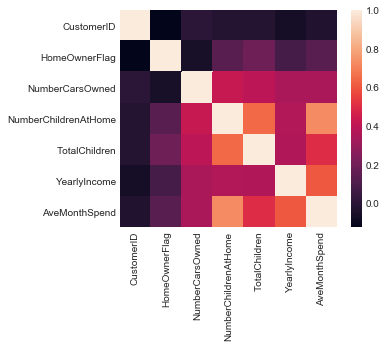

In [6]:
#Heat map
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

In [7]:
df_train.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
Title,88,5,Mr.,43
FirstName,16749,662,Isabella,91
MiddleName,9696,44,L,1178
LastName,16749,363,Diaz,193
Suffix,2,1,Jr.,2
AddressLine1,16749,11879,Attaché de Presse,18
AddressLine2,281,154,Verkaufsabteilung,28
City,16749,270,London,379
StateProvinceName,16749,52,California,4023
CountryRegionName,16749,6,United States,7088


In [8]:
df_train["BirthDate"]=pd.to_datetime(df_train['BirthDate'], infer_datetime_format=True)
df_train['year']=df_train['BirthDate'].dt.year

In [9]:
df_train['Age']=1998-df_train['year']
df_train.head(5).T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [10]:
df_test["BirthDate"]=pd.to_datetime(df_test['BirthDate'], infer_datetime_format=True)
df_test['year']=df_test['BirthDate'].dt.year
df_test['Age']=1998-df_test['year']
df_test.head(5).T

,0,1,2,3,4
CustomerID,18988,29135,12156,13749,27780
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Courtney,Adam,Bonnie,Julio,Christy
MiddleName,A,C,NaN,C,A
LastName,Baker,Allen,Raji,Alonso,Andersen
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,8727 Buena Vista Ave.,3491 Cook Street,359 Pleasant Hill Rd,8945 Euclid Ave.,"42, boulevard Tremblay"
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Fremont,Haney,Burbank,Burlingame,Dunkerque
StateProvinceName,California,British Columbia,California,California,Nord


In [12]:
cars={0:'No cars', 1:'>1 cars', 2:'>1 cars', 3:'>3 cars', 4:'>3 cars'}
dataset=[df_train, df_test]
for data in dataset:
    data['NumberCarsOwned']=data['NumberCarsOwned'].replace(cars)

In [13]:
children={0:'No Children', 1:'More than 1', 2:'More than 1', 3:'More than 1', 4:'More than 1', 5:'More than 1'}
dataset=[df_train, df_test]
for data in dataset:
    data['NumberChildrenAtHome']=data['NumberChildrenAtHome'].replace(children)

In [14]:
df_train.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,year,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,No cars,No Children,2,137947,89,1966,32
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,>1 cars,More than 1,3,101141,117,1965,33
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,>1 cars,More than 1,3,91945,123,1965,33
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,>1 cars,No Children,0,86688,50,1968,30
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,>3 cars,More than 1,5,92771,95,1968,30


In [15]:
dataset=[df_train, df_test]
for data in dataset:
    del data['year']

In [16]:
child={0:'No Children', 1:'More than 1', 2:'More than 1', 3:'More than 1', 4:'More than 1', 5:'More than 1'}
dataset=[df_train, df_test]
for data in dataset:
    data['TotalChildren']=data['TotalChildren'].replace(child)

In [17]:
columns=['CustomerID','CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 
         'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'Age']
train=df_train[columns]

cols=['CustomerID','CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 
      'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age']
test=df_test[cols]

In [18]:
train['Age']=np.log(train['Age'])
train['YearlyIncome']=(train['YearlyIncome'])**0.5

In [19]:
test['Age']=np.log(test['Age'])
test['YearlyIncome']=(test['YearlyIncome'])**0.5

In [20]:
col=['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus','NumberCarsOwned', 
        'NumberChildrenAtHome','TotalChildren']
train=pd.get_dummies(train, prefix=col, columns=col)
test=pd.get_dummies(test, prefix=col, columns=col)

In [21]:
train.columns

Index(['CustomerID', 'HomeOwnerFlag', 'YearlyIncome', 'AveMonthSpend', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children'],
      dtype='object')

In [23]:
print('Shape of train', train.shape)
print('Shape of test', test.shape)

Shape of train (16749, 32)
Shape of test (500, 31)


Text(0.5,1,'Correlation Matrix')

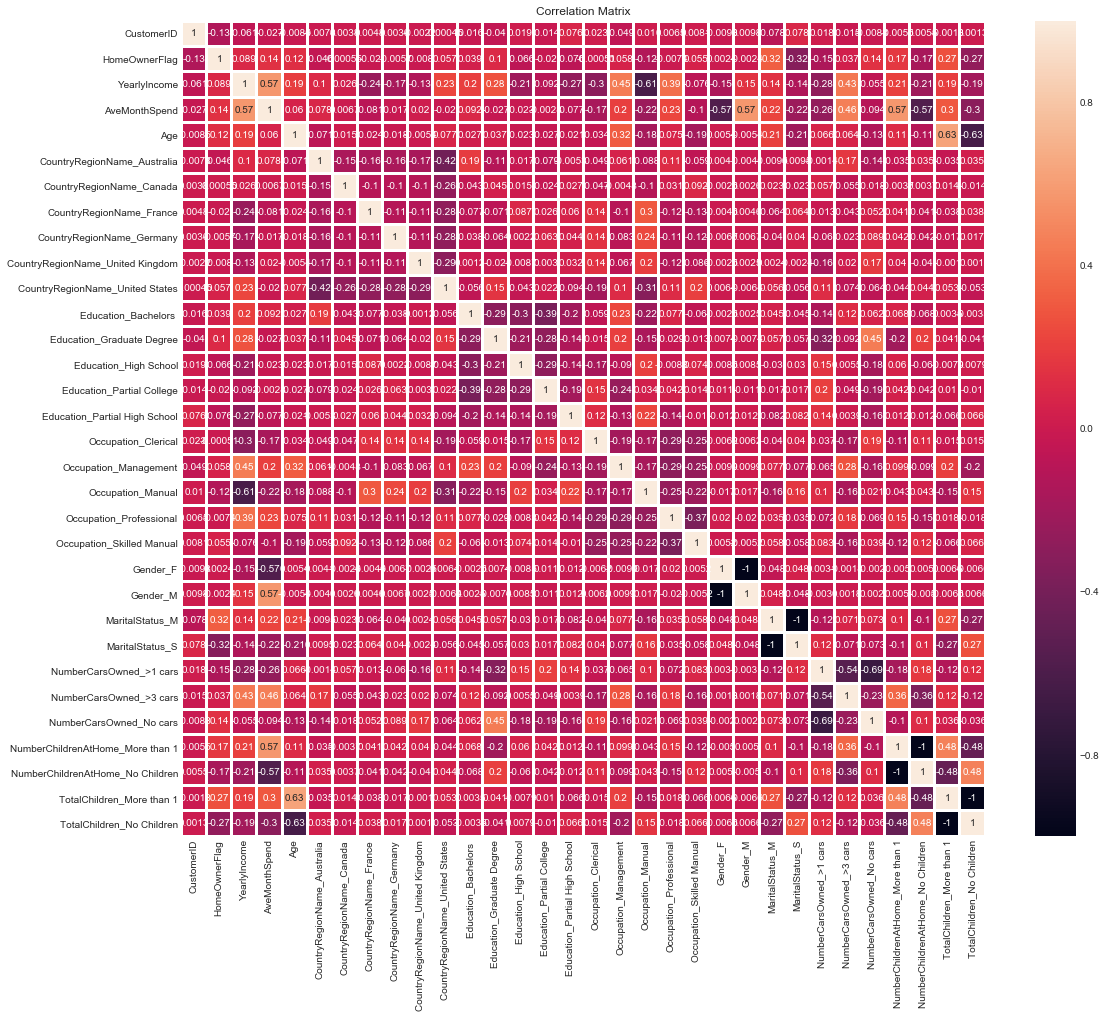

In [24]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(train.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from math import sqrt

In [26]:
feature_col=['HomeOwnerFlag', 'YearlyIncome', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children']
predicted_class_names=['AveMonthSpend']
X=train[feature_col].values
y=train[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [27]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [28]:
column=['HomeOwnerFlag', 'YearlyIncome', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children']
test1=test[column]

In [29]:
print(X_train.shape)
print(test1.shape)

(11724, 30)
(500, 30)


In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [31]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
regpred=reg.predict(X_train)
regpred_test=reg.predict(X_test)
print("Accuracy on training set:{:.7f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(reg.score(X_test, y_test)))

MSE= mean_squared_error(y_train, regpred)
MSE_test= mean_squared_error(y_test, regpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set:0.8445779
Accuracy on test set: 0.8434755
MSE: 116.16466778745473
MSE Test: 116.27940446791683
RMSE: 10.777971413371569
RMSE Test: 10.78329283975525


In [35]:
solution=reg.predict(test1)
np.savetxt('RegressionPredictions1_finalLab.csv', solution, delimiter=',')

# my_submission = pd.DataFrame({'CustomerID':X_test.CustomerID,'AveMonthSpend': solution})
# my_submission.to_csv('RegressionPredictions2_finalLab.csv', index=False)